# 12. 모델뉴닝 & 과적합의 위험성

In [39]:
library(tidyverse)
library(tidymodels)
ggplot2::theme_set(theme_bw())
tidymodels_prefer()
library(ggforce)

In [5]:
data(two_class_dat)
set.seed(91)
split <- initial_split(two_class_dat)
training_set <- training(split)
testing_set  <-  testing(split)

data_grid <- crossing(A = seq(0.4, 4, length = 200), 
                      B = seq(.14, 3.9, length = 200))
data_grid %>% glimpse

Rows: 40,000
Columns: 2
$ A <dbl> 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4~
$ B <dbl> 0.1400000, 0.1588945, 0.1777889, 0.1966834, 0.2155779, 0.2344724, 0.~


- 예측에 모형을 사용하려면 해당 모형에 대한 모수를 추정해야 함. 이러한 매개 변수 중 일부는 훈련 데이터에서 직접 추정할 수 있지만, 튜닝 매개 변수 또는 하이퍼 매개 변수라고 하는 다른 매개 변수는 미리 지정해야 하며 교육 데이터에서 직접 찾을 수 없음. 
- 이러한 값은 모형에 상당한 영향을 미치지만 데이터에서 직접 추정할 수 없는 알려지지 않은 구조 또는 기타 유형의 값


# 
# 
## 12.1 모델 파라미터
- 일반 선형 회귀 분석 :

$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$

$\hat \beta_1 = \frac{\sum_i (y_i-\bar{y})(x_i-\bar{x})}{\sum_i(x_i-\bar{x})^2}$

$\hat \beta_0 = \bar{y}-\hat \beta_1 \bar{x}.$

# 

- KNN :

$\hat y = \frac{1}{K}\sum_{\ell = 1}^K x_\ell^*$

- 여기서 K는 이웃의 수이고 x는 $x_t*$에 가장 가까운 K개의 값들
- **모형 자체는 모형 방정식으로 정의되지 않으며, 이전 예측 방정식이 대신 정의** 
- 이 특성은 거리 측정의 가능한 난해성과 함께 K에 대해 풀 수 있는 방정식 집합을 만드는 것을 불가능하게 만듬. 
- 이웃의 수는 모델에 심각한 영향을 미침. => 즉, 클래스 경계의 유연성을 관리. K의 작은 값의 경우 경계가 매우 정교하지만 큰 값의 경우 매우 부드러울 수 있음.


# 
# 
## 12.2 다른 유형의 모델에 대한 조정 매개 변수
- 다양한 통계 및 기계 학습 모델에서 하이퍼 파라미터 조정의 많은 예가 존재.

    - 부스팅은 일련의 기본 모델을 결합하는 앙상블 방식으로, 각 모델은 순차적으로 생성되며 이전 모델에 따라 달라짐. 부스팅 반복 횟수는 일반적으로 최적화가 필요한 중요한 조정 매개 변수.
    - 고전적인 단층 인공 신경망(일명 다층 퍼셉트론)에서 예측 변수는 두 개 이상의 숨겨진 단위를 사용하여 결합. 숨겨진 단위는 활성화 함수(일반적으로 시그모이드와 같은 비선형 함수)에서 포착되는 예측 변수의 선형 조합. 은닉층은 출력층에 연결, 
        - 회귀 모형에는 한 개의 출력층 유닛 사용되며, 분류에는 여러 개의 출력층 유닛이 필요
        - 은닉층의 유닛의 수와 활성화 기능의 유형은 중요한 구조 조정 파라미터
    - 경사 하강 방법은 올바른 최적화 매개 변수를 찾아 개선. 이러한 초 매개 변수의 예로는 학습 속도, 운동량 및 최적화 반복/에포크 수
        - 신경망과 일부 앙상블 모델은 모델 매개 변수를 추정하기 위해 경사 하강법을 사용. 경사 하강과 관련된 조정 매개변수는 구조적 매개변수가 아니지만, 종종 조정이 필요.

# 

- 전처리에도 하이퍼 파라미터 조정이 필요한 경우
    - PCA 또는 PLS
    - 결측값 대체시 하나 이상의 예측 변수의 전체 값을 사용하여 결측 예측 변수 값을 추정
        - 하나의 효과적인 결측값 대체 도구는 전체 열의 K-가장 가까운 이웃을 사용하여 결측값을 예측

# 
- 일부 고전적 통계 모델에는 구조적 매개 변수도 존재.
    - 이항 회귀 분석에서는 로짓 링크가 일반적으로 사용됩니다(즉, 로지스틱 회귀 분석). 프로빗과 보완 로그와 같은 다른 링크 기능도 사용할 수 있음

# 

- 조정할 필요가 없는 매개 변수의 반례는 랜덤 포레스트 또는 배깅 모델의 트리 수
    - 대신 이 값은 결과의 수치적 안정성을 보장할 수 있을 만큼 충분히 크도록 선택해야 함. 
    - 신뢰할 수 있는 결과를 산출할 수 있을 만큼 값이 크지 않으면, 이 값은 성능을 향상시킬 수 없음. 랜덤 포레스트의 경우, 이 값은 일반적으로 수천 개이며, 배깅에 필요한 트리의 수는 약 50~100개입니다.






# 
# 
## 최적화

- 두 개의 예측 변수가 있는 두 개의 클래스 분류 데이터 세트 예

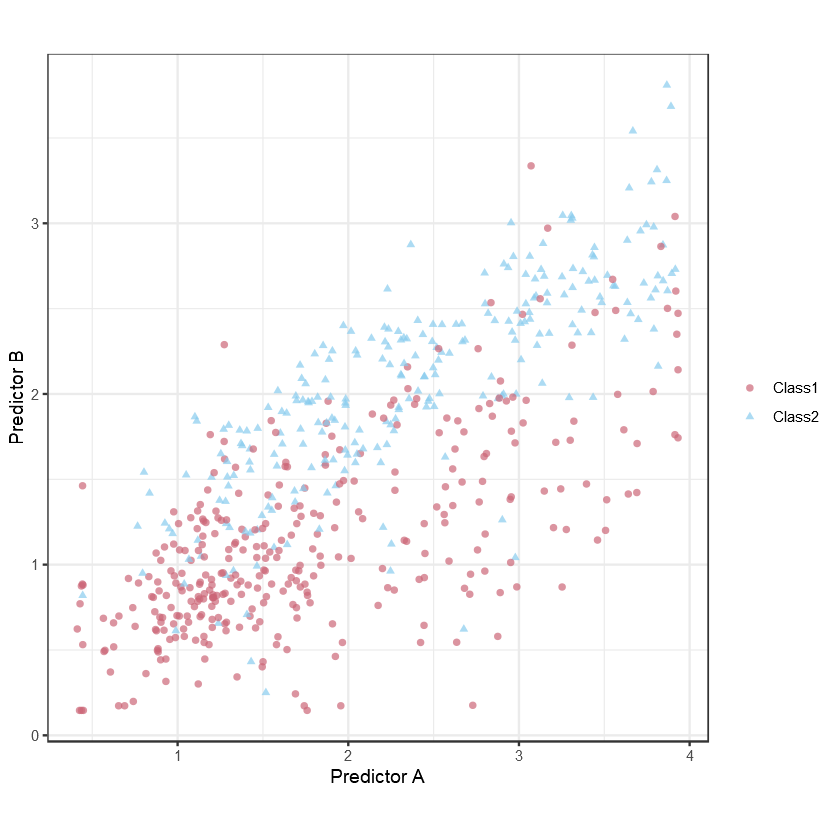

In [6]:
ggplot(training_set, aes(x = A, y = B, color = Class, pch = Class)) + 
    geom_point(alpha = 0.7) + 
    coord_equal()  + 
    labs(x = "Predictor A", y = "Predictor B", color = NULL, pch = NULL) +
    scale_color_manual(values = c("#CC6677", "#88CCEE"))

- 우리는 이 데이터에 선형 클래스 경계를 맞추는 것으로 시작 가능. 
- 가장 일반적인 방법은 로지스틱 회귀 분석의 형태로 일반화된 선형 모형을 사용하는 것. 이 모형은 로짓 변환을 사용하여 표본이 클래스 1인 로그 승산을 연관시킵니다.
    - GLM의 맥락에서 로짓 함수는 설명변수와 반응변수 사이의 연결 함수


$\log\left(\frac{\pi}{1 - \pi}\right) = \beta_0 + \beta_1x_1 + \ldots + \beta_px_p$


# 

- 프로빗 모델을 포함하는 다른 링크 함수 :
    - 여기서 $\Phi$는 누적 표준 정규 함수이자 상보 로그-로그 모델

$\Phi^{-1}(\pi) = \beta_0 + \beta_1x_1 + \ldots + \beta_px_p$

$\log(-\log(1-\pi)) = \beta_0 + \beta_1x_1 + \ldots + \beta_px_p$

# 

- 결과에 따르면 로지스틱 모형의 통계적 특성이 가장 우수

In [9]:
lihood <- function(...) {
    logistic_reg() %>%
        set_engine("glm", ...) %>%
        fit(Class ~ ., data = training_set) %>%
        glance() %>%
        select(logLik)
}

In [11]:
bind_rows(
    lihood(),
    lihood(family = binomial(link = "probit")),
    lihood(family = binomial(link = "cloglog"))
) %>%
    mutate(link = c("logit", "probit", "c-log-log")) %>%
    arrange(desc(logLik))

logLik,link
<dbl>,<chr>
-257.5885,logit
-261.6862,probit
-269.7402,c-log-log


# 

- 로그 우도 값의 척도로 볼 때 이러한 차이가 중요한지 무시할 수 있는지 이해하기 어려움. 
- 이 분석을 개선하는 한 가지 방법은 통계를 다시 샘플링하고 성능 추정에 사용되는 데이터와 모델링 데이터를 분리하는 것
- 작은 데이터 세트를 사용하는 경우, 10-교차 검증을 반복하는 것이 재샘플링을 위한 좋은 선택
- 기준 패키지에서 ```mn_log_loss()``` 함수는 음의 로그 우도를 추정하는 데 사용

In [12]:
set.seed(1201)
rs <- vfold_cv(training_set, repeats = 10)

In [17]:
lloss <- function(...) {
    perf_meas <- metric_set(roc_auc, mn_log_loss)
    
    logistic_reg() %>% 
        set_engine("glm", ...) %>% 
        fit_resamples(Class ~ A + B, rs, metrics = perf_meas) %>% 
        collect_metrics(summarize = FALSE) %>%
        select(id, id2, .metric, .estimate)
}


In [24]:
lloss() %>% head()

id,id2,.metric,.estimate
<chr>,<chr>,<chr>,<dbl>
Repeat01,Fold01,roc_auc,0.7274750
Repeat01,Fold01,mn_log_loss,0.7756045
Repeat01,Fold02,roc_auc,0.9318182
Repeat01,Fold02,mn_log_loss,0.3455889
Repeat01,Fold03,roc_auc,0.9302857
Repeat01,Fold03,mn_log_loss,0.3335940


In [18]:
resampled_res <- 
    bind_rows(
        lloss() %>% mutate(model = "logistic"),
        lloss(family = binomial(link = "probit")) %>% mutate(model = "probit"),
        lloss(family = binomial(link = "cloglog")) %>% mutate(model = "c-log-log")     
  ) %>%
    mutate(.estimate = ifelse(.metric == "mn_log_loss", -.estimate, .estimate)) %>% 
    group_by(model, .metric) %>% 
    summarize(
        mean = mean(.estimate, na.rm = TRUE),
        std_err = sd(.estimate, na.rm = TRUE) / sum(!is.na(.estimate)), 
        .groups = "drop"
  )

! Fold08, Repeat10: preprocessor 1/1, model 1/1: glm.fit: fitted probabilities numerically 0 or 1 occurred



In [22]:
resampled_res %>% print

# A tibble: 6 x 4
  model     .metric       mean  std_err
  <chr>     <chr>        <dbl>    <dbl>
1 c-log-log mn_log_loss -0.471 0.00108 
2 c-log-log roc_auc      0.882 0.000485
3 logistic  mn_log_loss -0.441 0.000875
4 logistic  roc_auc      0.881 0.000485
5 probit    mn_log_loss -0.449 0.000890
6 probit    roc_auc      0.881 0.000484


- 세 가지 다른 연결 함수를 사용하여 리샘플링된 이항 로그 우도에 대한 평균 및 약 90% 신뢰 구간

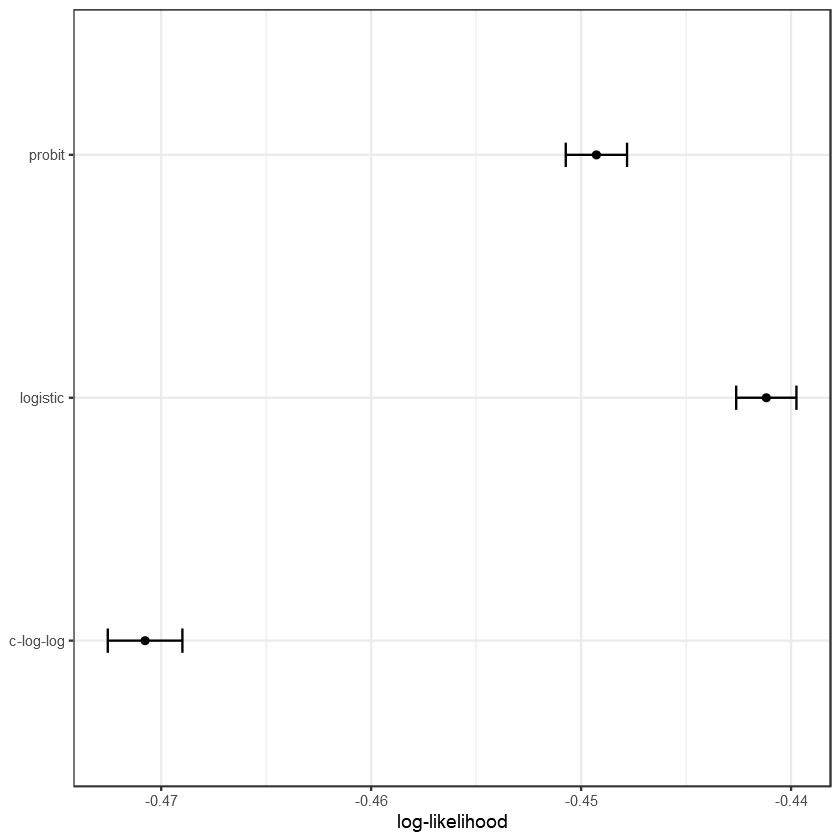

In [25]:
resampled_res %>% 
    filter(.metric == "mn_log_loss") %>% 
    ggplot(aes(x = mean, y = model)) + 
    geom_point() + 
    geom_errorbar(aes(xmin = mean - 1.64 * std_err, xmax = mean + 1.64 * std_err), width = .1) + 
    labs(y = NULL, x = "log-likelihood")

(```broom::glance()```에 의해 생성된 값은 합이고, ```yardstick::mn_log_loss()```는 평균)

# 

#### **연결 함수의 선택이 중요하고 로지스틱 모델이 우수하다는 상당한 증거가 있음을 보여줌**

# 


- 세 가지 다른 연결함수로 ROC 곡선에서 리샘플링된 영역에 대한 평균 및 약 90%의 신뢰 구간

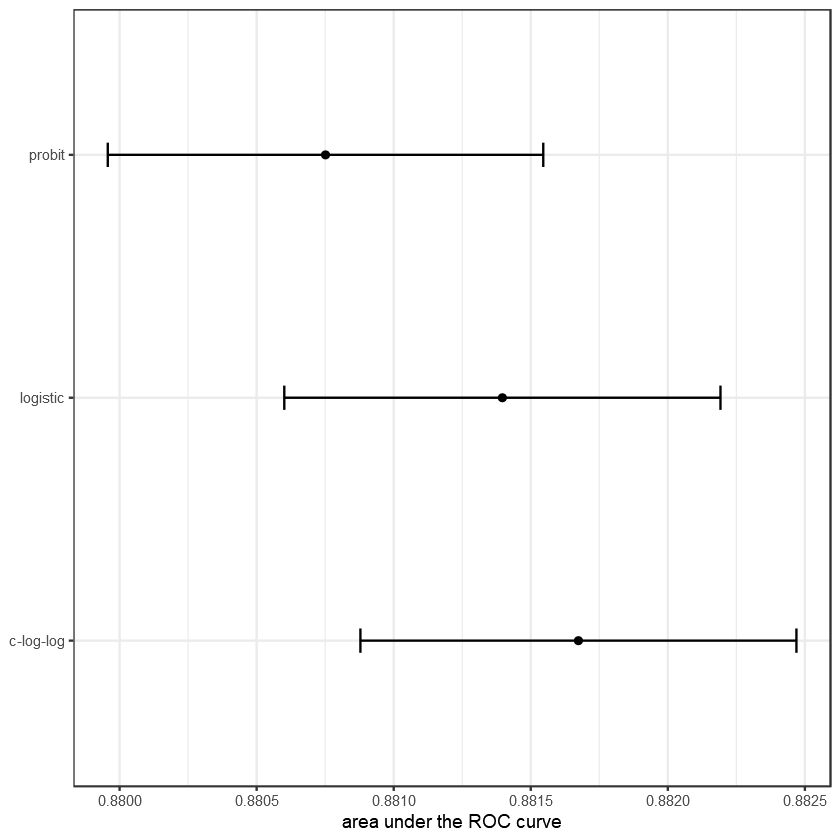

In [26]:
resampled_res %>% 
    filter(.metric == "roc_auc") %>% 
    ggplot(aes(x = mean, y = model)) + 
    geom_point() + 
    geom_errorbar(aes(xmin = mean - 1.64 * std_err, xmax = mean+ 1.64 * std_err), width = .1) + 
    labs(y = NULL, x = "area under the ROC curve")

# 
- 세 모델에 대한 클래스 경계가 198개 데이터 포인트의 테스트 세트에 중첩될 때 우리는 이것을 다시 볼 수 있다.

# 
# 


- 세 가지 연결 함수에 의한 선형 클래스 경계

In [27]:
logit_pred <- logistic_reg() %>% 
    set_engine("glm") %>% 
    fit(Class ~ A + B, data = training_set) %>% 
    predict(data_grid, type = "prob") %>% 
    bind_cols(data_grid) %>% 
    mutate(link = "logit")

probit_pred <-  logistic_reg() %>% 
    set_engine("glm", family = binomial(link = "probit")) %>% 
    fit(Class ~ A + B, data = training_set) %>% 
    predict(data_grid, type = "prob") %>% 
    bind_cols(data_grid) %>% 
    mutate(link = "probit")

cloglog_pred <- logistic_reg() %>% 
    set_engine("glm", family = binomial(link = "cloglog")) %>% 
    fit(Class ~ A + B, data = training_set) %>% 
    predict(data_grid, type = "prob") %>% 
    bind_cols(data_grid) %>% 
    mutate(link = "c-log-log")

In [33]:
link_grids <- bind_rows(logit_pred, probit_pred, cloglog_pred) %>% 
    mutate(link = factor(link, levels = c("logit", "probit", "c-log-log")))
link_grids %>% glimpse

Rows: 120,000
Columns: 5
$ .pred_Class1 <dbl> 0.9736124, 0.9717950, 0.9698563, 0.9677888, 0.9655845, 0.~
$ .pred_Class2 <dbl> 0.02638761, 0.02820499, 0.03014367, 0.03221118, 0.0344154~
$ A            <dbl> 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.~
$ B            <dbl> 0.1400000, 0.1588945, 0.1777889, 0.1966834, 0.2155779, 0.~
$ link         <fct> logit, logit, logit, logit, logit, logit, logit, logit, l~


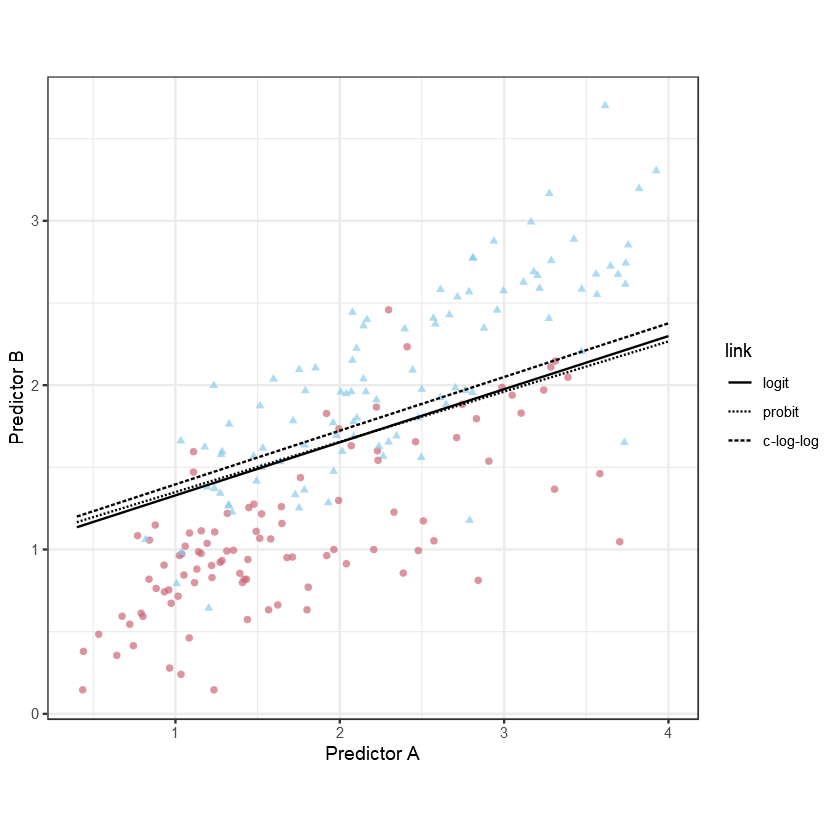

In [34]:
link_grids %>% ggplot(aes(x = A, y = B)) + 
    geom_point(data = testing_set, aes(color = Class, pch = Class), 
               alpha = 0.7, show.legend = FALSE) + 
    geom_contour(aes( z = .pred_Class1, lty = link), breaks = 0.5, color = "black") + 
    scale_color_manual(values = c("#CC6677", "#88CCEE")) + 
    coord_equal() + 
    labs(x = "Predictor A", y = "Predictor B")

# 
# 
## 12.4 부적절한 파라미터 추정의 결과
- 많은 조정 매개 변수가 모델 복잡성의 양을 조절
    - 예를 들어, 스플라인 함수에 자유도를 추가하면 예측 방정식의 복잡성이 증가
- **훈련 데이터가 복잡할 때 장점이지만, 새로운 데이터에서는 재현되지 않는 기회 패턴에 대한 과도한 해석으로 이어질 수도 있음** 
- **과적합은 모델이 훈련 데이터에 너무 많이 적응하는 상황. 모델을 구축하는 데 사용된 데이터에는 잘 수행되지만 새로운 데이터에는 잘 수행되지 않음.**

# 

- **파라미터의 조정으로 모형의 복잡성이 증가할 수 있으므로, 파라미터의 선택이 잘못되면 과적합이 발생할 수 있음**



# 
- 단일 계층 신경망 모델에서. 은닉층의 수가 증가함에 따라 모형의 복잡성도 증가


- 은닉층의 개수가 증가하는 세 가지 모델에 대한 영역 경계




In [35]:
two_class_rec <- recipe(Class ~ ., data = two_class_dat) %>% 
    step_normalize(all_numeric_predictors()) 

mlp_mod <- mlp(hidden_units = tune(), epochs = 1000) %>% 
    set_engine("nnet") %>%
    set_mode("classification")

mlp_wflow <- workflow() %>% 
    add_recipe(two_class_rec) %>% 
    add_model(mlp_mod)

mlp_res <- tibble(
    hidden_units = 1:20,
    train = NA_real_,
    test = NA_real_,
    model = vector(mode = "list", length = 20))

In [36]:
for(i in 1:nrow(mlp_res)) {
    set.seed(27)
    tmp_mod <- mlp_wflow %>% finalize_workflow(mlp_res %>% slice(i) %>% select(hidden_units)) %>% 
        fit(training_set)
    mlp_res$train[i] <- roc_auc_vec(training_set$Class, predict(tmp_mod, training_set, type = "prob")$.pred_Class1)
    mlp_res$test[i]  <- roc_auc_vec(testing_set$Class, predict(tmp_mod, testing_set, type = "prob")$.pred_Class1)
    mlp_res$model[[i]] <- tmp_mod
}

In [50]:
mlp_res %>% print

# A tibble: 20 x 4
   hidden_units train  test model     
          <int> <dbl> <dbl> <list>    
 1            1 0.883 0.909 <workflow>
 2            2 0.894 0.914 <workflow>
 3            3 0.895 0.910 <workflow>
 4            4 0.899 0.908 <workflow>
 5            5 0.901 0.898 <workflow>
 6            6 0.912 0.868 <workflow>
 7            7 0.904 0.877 <workflow>
 8            8 0.918 0.850 <workflow>
 9            9 0.916 0.864 <workflow>
10           10 0.924 0.848 <workflow>
11           11 0.927 0.836 <workflow>
12           12 0.917 0.888 <workflow>
13           13 0.933 0.831 <workflow>
14           14 0.938 0.838 <workflow>
15           15 0.935 0.851 <workflow>
16           16 0.943 0.820 <workflow>
17           17 0.939 0.845 <workflow>
18           18 0.943 0.851 <workflow>
19           19 0.945 0.830 <workflow>
20           20 0.945 0.847 <workflow>


In [41]:
te_plot <- mlp_res %>% slice(c(1, 4, 20)) %>% 
    mutate(probs = map(model, ~ bind_cols(data_grid, predict(.x, data_grid, type = "prob")))) %>% 
    dplyr::select(hidden_units, probs) %>% 
    unnest(cols = c(probs)) %>% 
    mutate(label = paste(format(hidden_units), "units"),
           label = ifelse(label == " 1 units", " 1 unit", label)) %>% 
    ggplot(aes(x = A, y = B)) + 
    geom_point(data = testing_set, aes(color = Class, pch = Class), 
               alpha = 0.5, show.legend = FALSE) + 
    geom_contour(aes( z = .pred_Class1), breaks = 0.5, color = "black") + 
    scale_color_manual(values = c("#CC6677", "#88CCEE")) + 
    facet_wrap(~ label, nrow = 1) + 
    coord_equal() + 
    ggtitle("Test Set") + 
    labs(x = "Predictor A", y = "Predictor B")

tr_plot <- mlp_res %>% slice(c(1, 4, 20)) %>% 
    mutate(probs = map(model, ~ bind_cols(data_grid, predict(.x, data_grid, type = "prob")))) %>% 
    dplyr::select(hidden_units, probs) %>% 
    unnest(cols = c(probs)) %>% 
    mutate(label = paste(format(hidden_units), "units"),
           label = ifelse(label == " 1 units", " 1 unit", label)) %>% 
    ggplot(aes(x = A, y = B)) +
    geom_point(data = training_set, aes(color = Class, pch = Class), 
               alpha = 0.5, show.legend = FALSE) + 
    geom_contour(aes( z = .pred_Class1), breaks = 0.5, color = "black") + 
    scale_color_manual(values = c("#CC6677", "#88CCEE")) + 
    facet_wrap(~ label, nrow = 1) + 
    coord_equal() + 
    ggtitle("Training Set") + 
    labs(x = "Predictor A", y = "Predictor B")

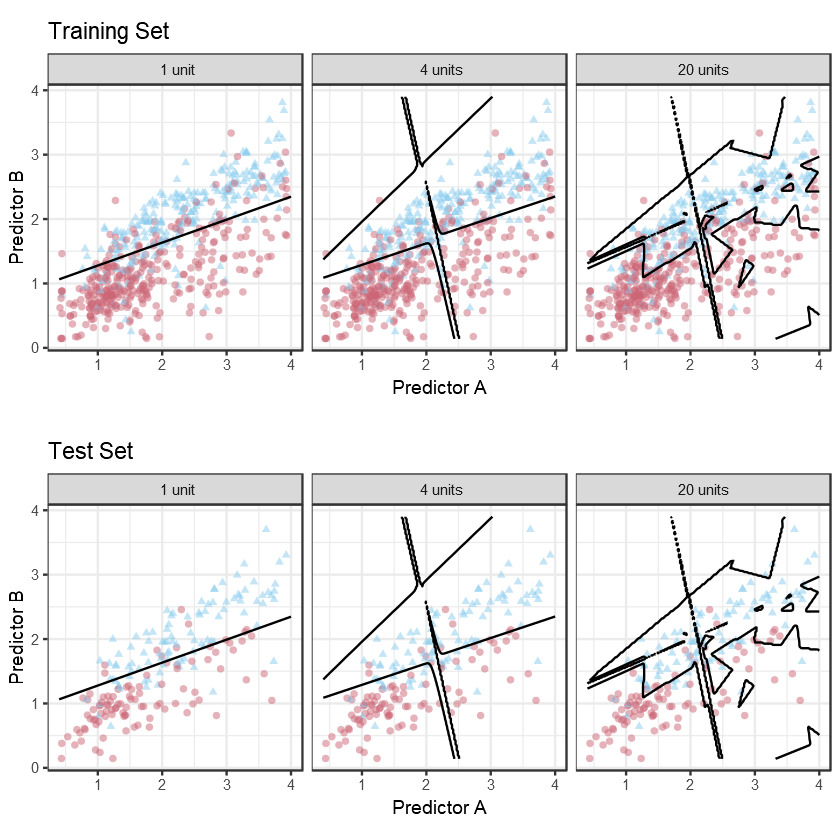

In [44]:
gridExtra::grid.arrange(tr_plot, te_plot, nrow = 2)

# 
# 
# 
## 12.5 최적화를 위한 두 가지 일반적인 전략

- 조정 매개 변수 최적화는 일반적으로 '그리드 서치'와 '반복 서치'의 두 가지 범주 중 하나로 분류

# 

- **'그리드 서치'는 평가할 매개 변수 값 집합을 미리 정의하는 것** 
    - '그리드 서치'와 관련된 주요 선택은, 그리드를 만드는 방법과 평가할 매개 변수 조합 수
    - 파라미터 공간을 커버하는 데 필요한 그리드 포인트의 수가 차원의 저주로 인해 관리할 수 없게 될 수 있기 때문에 그리드 서치는 종종 비효율적인 것으로 판단됨. 

-  '반복 서치' 또는 순차 검색은 이전 결과를 기반으로 새로운 매개 변수 조합을 순차적으로 발견하는 경우
    - 일부 방법이 다른 방법보다 효율적이긴 하지만 거의 모든 비선형 최적화 방법이 적합
    - 경우에 따라 최적화 프로세스를 시작하려면 하나 이상의 파라미터 조합에 대한 초기 결과 세트가 필요

# 

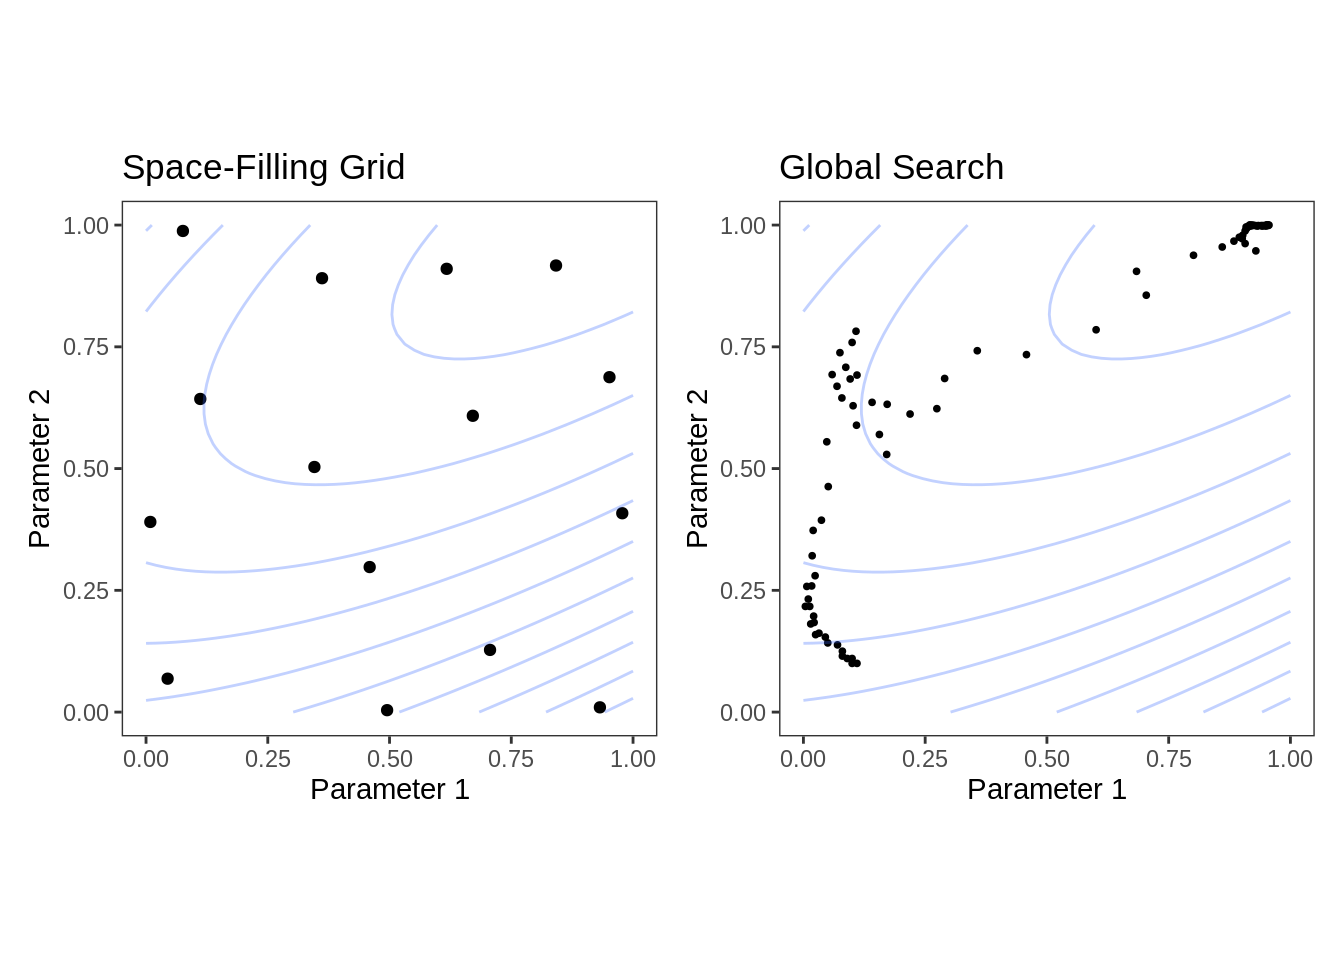

- 그림의 왼쪽 패널은 **공간 채우기 설계라고 하는 그리드 유형**
    - 이것은 파라미터 조정 조합이 서로 가깝지 않도록 파라미터 공간을 커버하기 위해 고안된 실험 설계의 한 유형
    - **이 설계의 결과는 실제로 최적의 위치에 점을 정확하게 배치하지 않음**
    
    
# 

- 오른쪽 패널은 **글로벌 검색 방법인 Nelder-Mead simplex 방법**
    - 시작점은 매개변수 공간의 왼쪽 아래
    - 검색은 최적의 위치에 도달할 때까지 공간을 가로질러 구부러지며, 여기서 가능한 한 수치적으로 최상의 값에 근접하려고 노력
    - 이 검색 방법은 효과적이지만 효율성에 대해서는 알려져 있지 않음. 특히 최적 값에 가까운 많은 기능 test가 필요

# 
# 
# 
## 12.6 TIDYMODELS의 파라미터 조정
- 보조 튜닝 파라미터 세트는 엔진마다 다름. 
- 자주 최적화되지 않거나 특정 엔진에만 한정. 
    - 랜덤 포레스트를 예로 들면, ranger 패키지에는 다른 패키지에서는 사용하지 않는 일부 인수가 포함되어 있음. 
    - 한 가지 예는 트리 유도 과정에서 예측 변수 선택을 정규화하는 gain penalty : 이 매개 변수는 앙상블에 사용된 예측 변수 수와 성능 사이의 균형을 조정하는 데 도움
    - ranger()에서 이 인수의 이름은 ```regularization.factor```. (parsnip 모델 사양을 통해 값을 지정하기 위해 set_engine()에 보조 인수로 추가)
- **파라미터는 엔진 간의 불일치를 제거하기 위해 공통된 명명 시스템을 사용하는 반면, 엔진별 보조 파라미터는 그렇지 않음.**



In [54]:
rand_forest(trees = 2000, min_n = 10) %>%    # <- 주요 파라미터
    set_engine("ranger", regulization.factor = 0.5)    # <- 보조 튜닝 파라미터

Random Forest Model Specification (unknown mode)

Main Arguments:
  trees = 2000
  min_n = 10

Engine-Specific Arguments:
  regulization.factor = 0.5

Computational engine: ranger 


# 

### ```tune()```
- **파라미터에 tune() 값을 할당하여 조정하도록 표시**

In [55]:
neural_net_spec <- mlp(hidden_units = tune()) %>%
    set_mode("regression") %>%
    set_engine("keras")

# 
### ```extract_parameter_set_dials()``` : 개체의 튜닝 매개 변수를 열거

- nparam[+] : 은닉층의 수가 숫자 파라미터임을 나타냄

In [58]:
extract_parameter_set_dials(neural_net_spec) %>% print

Collection of 1 parameters for tuning

   identifier         type    object
 hidden_units hidden_units nparam[+]



- 이름과 매개 변수를 연결하는 선택적 식별 인수
- 이 기능은 동일한 종류의 매개 변수가 다른 장소에서 조정될 때 유용
    - 예를 들어, 스플라인 함수에서, 서로 다른 수준의 평활도를 가지도록 두 스플라인 함수를 조정하려면 각 예측 변수에 대해 한 번씩 step_ns()를 두 번 호출
    - 매개 변수를 식별할 수 있도록 하기 위해 identification 인수는 다음과 같은 문자열을 사용할 수 있음

In [60]:
data(ames)
ames <- mutate(ames, Sale_Price = log10(Sale_Price))

set.seed(502)
ames_split <- initial_split(ames, prop = 0.80, strata = Sale_Price)
ames_train <- training(ames_split)
ames_test  <- testing(ames_split)

In [61]:
ames_rec <- recipe(Sale_Price ~ Neighborhood + Gr_Liv_Area + Year_Built + Bldg_Type + Latitude + Longitude, data = ames_train)  %>%
    step_log(Gr_Liv_Area, base = 10) %>% 
    step_other(Neighborhood, threshold = tune()) %>% 
    step_dummy(all_nominal_predictors()) %>% 
    step_interact( ~ Gr_Liv_Area:starts_with("Bldg_Type_") ) %>% 
    step_ns(Longitude, deg_free = tune("longitude df")) %>% 
    step_ns(Latitude,  deg_free = tune("latitude df"))

In [63]:
recipes_param <- extract_parameter_set_dials(ames_rec)
recipes_param %>% print

Collection of 3 parameters for tuning

   identifier      type    object
    threshold threshold nparam[+]
 longitude df  deg_free nparam[+]
  latitude df  deg_free nparam[+]



# 
- **워크플로를 사용하여 레시피와 모델을 결합하면 두 파라미터 세트가 모두 표시**

In [64]:
wflow_param <- workflow() %>% 
    add_recipe(ames_rec) %>% 
    add_model(neural_net_spec) %>% 
    extract_parameter_set_dials()

In [65]:
wflow_param %>% print

Collection of 4 parameters for tuning

   identifier         type    object
 hidden_units hidden_units nparam[+]
    threshold    threshold nparam[+]
 longitude df     deg_free nparam[+]
  latitude df     deg_free nparam[+]



# 
- 스플라인과 함께 사용할 경우 ```spline_degree()```라는 특수 다이얼 함수 사용



In [66]:
spline_degree()

Piecewise Polynomial Degree (quantitative)
Range: [1, 10]

# 
- 다이얼 패키지에는 특정 매개 변수 개체를 추출하는 기능도 존재
### ```extract_parameter_dials()```

In [69]:
wflow_param %>% extract_parameter_dials("threshold") %>% print

Threshold (quantitative)
Range: [0, 0.1]


# 
- 파라미터 세트 내에서 파라미터의 범위를 적절하게 업데이트 가능

In [72]:
extract_parameter_set_dials(ames_rec) %>% 
    update(threshold = threshold(c(0.8, 1.0))) %>% print

Collection of 3 parameters for tuning

   identifier      type    object
    threshold threshold nparam[+]
 longitude df  deg_free nparam[+]
  latitude df  deg_free nparam[+]



# 
- 경우에 따라 가능한 값 범위에 대해 적절한 기본값을 사용하는 것이 용이. 
- 랜덤 포레스트 모형의 기본 파라미터는 트리의 각 분할에 대해 랜덤하게 샘플링되는 예측 변수 열의 수```mtry()```
    - 예측 변수의 수를 알지 못하면 이 모수 범위를 미리 구성할 수 없음

In [73]:
rf_spec <- rand_forest(mtry = tune()) %>%
    set_engine("ranger", regularization.factor = tune("regularization")) %>%
    set_mode("regression")

In [74]:
rf_param <- extract_parameter_set_dials(rf_spec)
rf_param %>% print

Collection of 2 parameters for tuning

     identifier                  type    object
           mtry                  mtry nparam[?]
 regularization regularization.factor nparam[+]

Model parameters needing finalization:
   # Randomly Selected Predictors ('mtry')

See `?dials::finalize` or `?dials::update.parameters` for more information.



- [?] : 가능한 범위의 적어도 한쪽 끝이 없음을 나타냄. 이를 처리하는 방법은 두 가지 :
    - 첫 번째는 ```update()```를 사용하여 데이터 차원에 대해 알고 있는 내용을 바탕으로 범위를 추가하는 것



In [76]:
rf_param %>% update(mtry = mtry(c(1, 70))) %>% print

Collection of 2 parameters for tuning

     identifier                  type    object
           mtry                  mtry nparam[+]
 regularization regularization.factor nparam[+]



# 
# 
### ```finalize()```
- **그러나 열을 추가하거나 빼는 단계를 사용하는 워크플로에 레시피가 연결된 경우에는 이 방법이 작동하지 않을 수 있음.**
- 이러한 단계를 튜닝하도록 예약하지 않은 경우 ```finalize()``` 함수는 레시피를 한 번 실행하여 치수를 구할 수 있음

# 

- 레시피가 준비되면 finalize() 함수는 mtry의 상위 범위를 74개의 예측 변수로 설정하는 방법을 학습

In [77]:
pca_rec <- recipe(Sale_Price ~ ., data = ames_train) %>% 
    step_normalize(contains("SF")) %>% 
    step_pca(contains("SF"), threshold = .95)

In [78]:
updated_param <- workflow() %>% 
    add_model(rf_spec) %>% 
    add_recipe(pca_rec) %>% 
    extract_parameter_set_dials() %>% 
    finalize(ames_train)

updated_param %>% print

Collection of 2 parameters for tuning

     identifier                  type    object
           mtry                  mtry nparam[+]
 regularization regularization.factor nparam[+]



In [79]:
updated_param %>% extract_parameter_dials("mtry") %>% print

# Randomly Selected Predictors (quantitative)
Range: [1, 74]


# 
# 
- 또한 ```extract_parameter_set_dials()```의 결과에는 엔진별 매개 변수(있는 경우)가 포함됨. 
- 주 파라미터와 동일한 방법으로 검색되며 파라미터 집합에 포함
- 다이얼 패키지에는 잠재적으로 조정 가능한 모든 엔진별 파라미터에 대한 기능이 포함


In [81]:
rf_param %>% print

Collection of 2 parameters for tuning

     identifier                  type    object
           mtry                  mtry nparam[?]
 regularization regularization.factor nparam[+]

Model parameters needing finalization:
   # Randomly Selected Predictors ('mtry')

See `?dials::finalize` or `?dials::update.parameters` for more information.



In [82]:
regularization_factor()

Gain Penalization (quantitative)
Range: [0, 1]

# 
- 일부 조정 파라미터는 변환이 필요. 
- 예로 많은 정규화된 회귀 모델과 관련된 페널티 매개 변수 :
    - 이 파라미터는 음수가 아니며 로그 단위로 값을 변경하는 것이 일반적
    - 기본 다이얼 매개 변수 개체는 변환이 기본적으로 사용됨을 나타냄

In [83]:
penalty()

Amount of Regularization (quantitative)
Transformer: log-10 [1e-100, Inf]
Range (transformed scale): [-10, 0]

- 0.1에서 1.0 사이의 패널티 값을 가지도록 설정

In [86]:
penalty(c(-1, 0)) %>% value_sample(1000) %>% summary() # 올바른 방법
# penalty(c(0.1, 1.0)) %>% value_sample(1000) %>% summary() # 올바르지 않은 방법

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1000  0.1843  0.3135  0.3848  0.5466  0.9970 

- ```trans```를 사용하여 원하는 경우 척도를 변경할 수 있음. 자연 단위를 사용할 수 있지만 범위는 동일

In [87]:
penalty(trans = NULL, range = 10^c(-10, 0))

Amount of Regularization (quantitative)
Range: [1e-10, 1]